<a href="https://colab.research.google.com/github/ekajanuartati/FinalTa_LSTM/blob/main/FinalTA_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout

from sklearn.preprocessing import MinMaxScaler 
from datetime import datetime
from sklearn.metrics import mean_squared_error
import math
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('ANTM.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2015,894.575317,894.575317,869.376038,877.775818,838.312317,5997189
1,1/5/2015,873.575928,881.975708,865.176147,873.575928,834.301331,9622884
2,1/6/2015,865.176147,873.575928,852.576477,860.976257,822.268127,11705560
3,1/7/2015,860.976257,881.975708,860.976257,873.575928,834.301331,14333014
4,1/8/2015,890.375488,953.373718,890.375488,936.574158,894.467285,87242404
...,...,...,...,...,...,...,...
1015,1/14/2019,795.000000,795.000000,775.000000,780.000000,746.611206,41648200
1016,1/15/2019,780.000000,830.000000,780.000000,820.000000,784.899048,165281200
1017,1/16/2019,830.000000,885.000000,825.000000,870.000000,832.758667,245187100
1018,1/17/2019,870.000000,885.000000,840.000000,845.000000,808.828918,92137700


In [ ]:
print(df.columns)
print(df.shape)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
(1020, 7)


In [ ]:
df = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume' ])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1020 non-null   object 
 1   Close   1020 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.1+ KB


In [ ]:
#mengubah Date dari format text (objek) ke format tanggal
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Close
0,2015-01-02,877.775818
1,2015-01-05,873.575928
2,2015-01-06,860.976257
3,2015-01-07,873.575928
4,2015-01-08,936.574158
...,...,...
1015,2019-01-14,780.000000
1016,2019-01-15,820.000000
1017,2019-01-16,870.000000
1018,2019-01-17,845.000000


In [ ]:
df['Date']

0      2015-01-02
1      2015-01-05
2      2015-01-06
3      2015-01-07
4      2015-01-08
          ...    
1015   2019-01-14
1016   2019-01-15
1017   2019-01-16
1018   2019-01-17
1019   2019-01-18
Name: Date, Length: 1020, dtype: datetime64[ns]

In [ ]:
df.describe()

,Close
count,1020.000000
mean,698.570662
std,170.216665
min,287.000000
25%,645.000000
50%,720.000000
75%,825.000000
max,995.000000


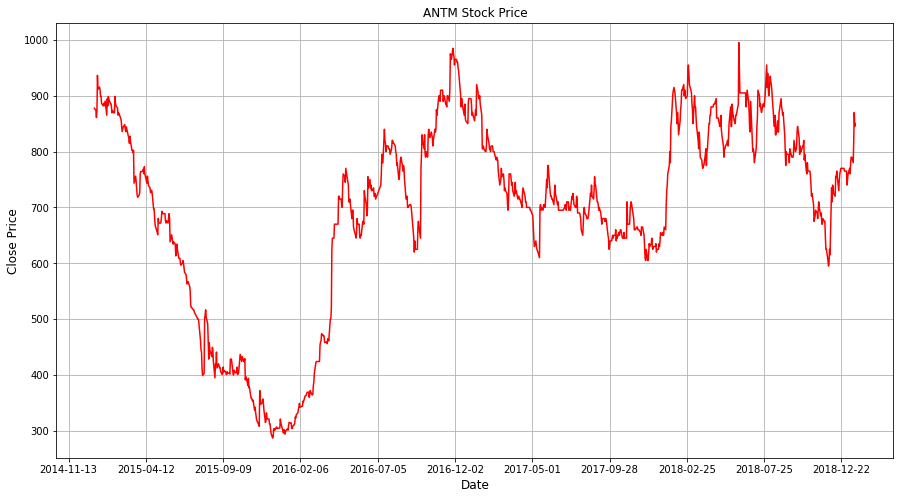

In [ ]:
#visualisasikan Data

#Plot Pergerakan Saham dari tahun 2015-2019
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df['Date'], df['Close'], color='red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='12')
ax.set_ylabel('Close Price', fontsize='12')
plt.title('ANTM Stock Price')
plt.grid()
plt.show()

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [ ]:
dataset[0:10]

array([[0.83442912],
       [0.82849707],
       [0.81070093],
       [0.82849707],
       [0.91747762],
       [0.88188542],
       [0.88781747],
       [0.88188542],
       [0.86408928],
       [0.86408928]])

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_data, test_data = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train_data), len(test_data))

816 204


In [ ]:
print(len(df))
print(816 + 204)

1020
1020


In [ ]:
print(train_data.shape)
print(test_data.shape)

(816, 1)
(204, 1)


In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

time_step = 100
x_train, y_train=createXY(train_data,time_step)
x_test,y_test=createXY(test_data,time_step)

In [ ]:
print("trainX Shape--", x_train.shape)
print("trainY Shape--", y_train.shape)
print("testX shape--", x_test.shape)
print("testY Shape--", y_test.shape)

trainX Shape-- (716, 100, 1)
trainY Shape-- (716,)
testX shape-- (104, 100, 1)
testY Shape-- (104,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
from keras.engine.training import Model
#time_step = 30
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(32, activation='relu', return_sequences= True))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='relu'))

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              metrics=[tf.keras.metrics.RootMeanSquaredError()], 
              loss='mean_squared_error')

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 100, 32)           4352      
                                                                 
 lstm_35 (LSTM)              (None, 100, 32)           8320      
                                                                 
 dropout_31 (Dropout)        (None, 100, 32)           0         
                                                                 
 dense_17 (Dense)            (None, 100, 1)            33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test), 
                    epochs=50, batch_size=8, verbose=1)

Epoch 1/50
90/90 [==============================] - 32s 330ms/step - loss: 0.1295 - root_mean_squared_error: 0.3598 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1859
Epoch 2/50
90/90 [==============================] - 30s 332ms/step - loss: 0.0748 - root_mean_squared_error: 0.2736 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1672
Epoch 3/50
90/90 [==============================] - 29s 321ms/step - loss: 0.0725 - root_mean_squared_error: 0.2687 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1694
Epoch 4/50
90/90 [==============================] - 30s 334ms/step - loss: 0.0707 - root_mean_squared_error: 0.2660 - val_loss: 0.0472 - val_root_mean_squared_error: 0.2172
Epoch 5/50
90/90 [==============================] - 28s 315ms/step - loss: 0.0700 - root_mean_squared_error: 0.2645 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1448
Epoch 6/50
90/90 [==============================] - 29s 323ms/step - loss: 0.0690 - root_mean_squared_error: 0.2630 - val_loss: 0.0335 

In [ ]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

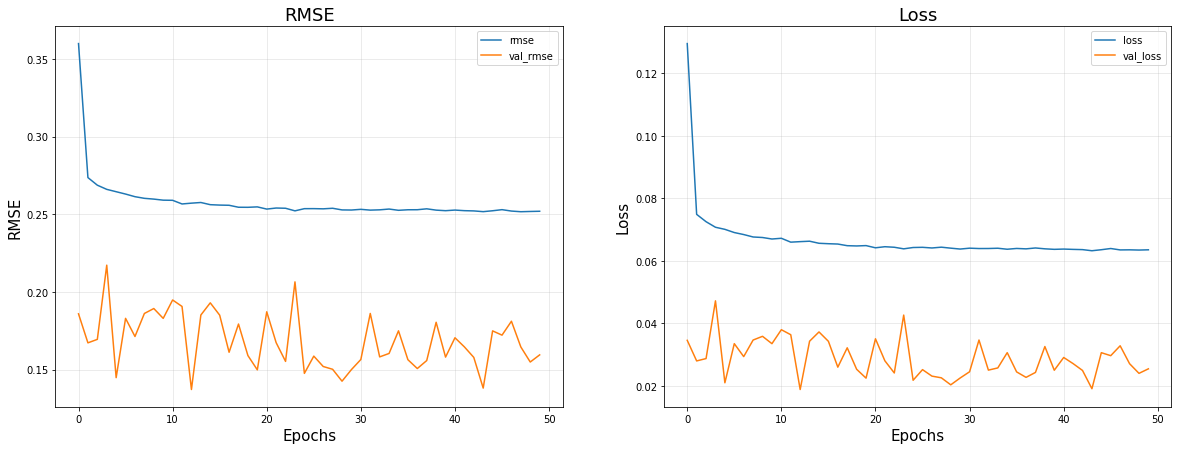

In [ ]:
fig = plt.figure(figsize=(20,7))
fig.add_subplot(121)

# Accuracy
plt.plot(history.epoch, history.history['root_mean_squared_error'], label = "rmse")
plt.plot(history.epoch, history.history['val_root_mean_squared_error'], label = "val_rmse")

plt.title("RMSE", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

#Adding Subplot 1 (For Loss)
fig.add_subplot(122)

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", np.round(results, 4))

4/4 [==============================] - 0s 27ms/step - loss: 0.0254 - root_mean_squared_error: 0.1543
test loss, test acc: [0.0254 0.1543]


In [ ]:
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import itertools
import random
import os

In [ ]:
# detect and init the TPU
# tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)

# instantiate a distribution strategy
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)


def LSTM_HyperParameter_Tuning(config, X_train, y_train, X_test, y_test):
    
    first_additional_layer, second_additional_layer, n_neurons, n_batch_size, dropout = config
    possible_combinations = list(itertools.product(first_additional_layer, second_additional_layer,
                                                  n_neurons, n_batch_size, dropout))
    
    print(possible_combinations)
    print('\n')
    
    hist = []
    
    for i in range(0, len(possible_combinations)):
        
        print(f'{i+1}th combination: \n')
        print('--------------------------------------------------------------------')
        
        first_additional_layer, second_additional_layer, n_neurons, n_batch_size, dropout = possible_combinations[i]
        
        # instantiating the model in the strategy scope creates the model on the TPU
        #with tpu_strategy.scope():
        model = Sequential()
        model.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
        model.add(Dropout(dropout))

        if first_additional_layer:
            model.add(LSTM(units=n_neurons, return_sequences=True))
            model.add(Dropout(dropout))

        if second_additional_layer:
            model.add(LSTM(units=n_neurons, return_sequences=True))
            model.add(Dropout(dropout))


        model.add(LSTM(units=n_neurons, return_sequences=False))
        model.add(Dropout(dropout))
        model.add(Dense(units=1, activation='relu'))
        model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
        '''''
        From the mentioned article above --> If a validation dataset is specified to the fit() function via the validation_data or v
        alidation_split arguments,then the loss on the validation dataset will be made available via the name “val_loss.”
        '''''

        file_path = 'best_model.h5'

        mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

        '''''
        cb = Callback(...)  # First, callbacks must be instantiated.
        cb_list = [cb, ...]  # Then, one or more callbacks that you intend to use must be added to a Python list.
        model.fit(..., callbacks=cb_list)  # Finally, the list of callbacks is provided to the callback argument when fitting the model.
        '''''

        model.fit(X_train, y_train, validation_split=0.2, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)

        # load the best model
        # model = load_model('best_model.h5')

        train_accuracy = model.evaluate(X_train, y_train, verbose=0)
        test_accuracy = model.evaluate(X_test, y_test, verbose=0)

        hist.append(list((first_additional_layer, second_additional_layer, n_neurons, n_batch_size, dropout,
                          train_accuracy, test_accuracy)))

        print(f'{str(i)}-th combination = {possible_combinations[i]} \n train accuracy: {train_accuracy} and test accuracy: {test_accuracy}')
        
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
         
    return hist


In [ ]:
config = [[False], [False], [16, 32, 50], [8, 16, 32], [0.2]]  

# list of lists --> [[first_additional_layer], [second_additional_layer], [n_neurons], [n_batch_size], [dropout]]

hist = LSTM_HyperParameter_Tuning(config, X_train, y_train, X_test, y_test)  # change x_train shape

[(False, False, 16, 8, 0.2), (False, False, 16, 16, 0.2), (False, False, 16, 32, 0.2), (False, False, 32, 8, 0.2), (False, False, 32, 16, 0.2), (False, False, 32, 32, 0.2), (False, False, 50, 8, 0.2), (False, False, 50, 16, 0.2), (False, False, 50, 32, 0.2)]


1th combination: 

--------------------------------------------------------------------

Epoch 1: val_loss improved from inf to 0.01092, saving model to best_model.h5

Epoch 2: val_loss improved from 0.01092 to 0.00887, saving model to best_model.h5

Epoch 3: val_loss improved from 0.00887 to 0.00569, saving model to best_model.h5

Epoch 4: val_loss improved from 0.00569 to 0.00557, saving model to best_model.h5

Epoch 5: val_loss improved from 0.00557 to 0.00519, saving model to best_model.h5

Epoch 6: val_loss improved from 0.00519 to 0.00479, saving model to best_model.h5

Epoch 7: val_loss improved from 0.00479 to 0.00400, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.00400

Epoch 9: val_loss improve

In [ ]:
hist = pd.DataFrame(hist)
hist = hist.sort_values(by=[6], ascending=True)
hist

,0,1,2,3,4,5,6
3,False,False,32,8,0.2,"[0.002122142817825079, 0.04606672003865242]","[0.0024438039399683475, 0.049434844404459]"
7,False,False,50,16,0.2,"[0.0018830192275345325, 0.04339376837015152]","[0.00248147826641798, 0.049814436584711075]"
0,False,False,16,8,0.2,"[0.002374648815020919, 0.04873036965727806]","[0.0027144444175064564, 0.05210033059120178]"
4,False,False,32,16,0.2,"[0.002332540461793542, 0.048296380788087845]","[0.0027931800577789545, 0.052850544452667236]"
5,False,False,32,32,0.2,"[0.002385614672675729, 0.04884275421500206]","[0.002853927668184042, 0.05342216417193413]"
8,False,False,50,32,0.2,"[0.0025565577670931816, 0.05056241527199745]","[0.0030300221405923367, 0.055045634508132935]"
2,False,False,16,32,0.2,"[0.0028520480263978243, 0.05340456962585449]","[0.003094021463766694, 0.05562392994761467]"
6,False,False,50,8,0.2,"[0.0026474306359887123, 0.05145318806171417]","[0.0033672393765300512, 0.05802791938185692]"
1,False,False,16,16,0.2,"[0.0030691910069435835, 0.05540027841925621]","[0.003975769504904747, 0.06305370479822159]"


In [ ]:
print(f'Best Combination: \n first_additional_layer = {hist.iloc[0, 0]}\n second_additional_layer = {hist.iloc[0, 1]}\n n_neurons = {hist.iloc[0, 2]}\n n_batch_size = {hist.iloc[0, 3]}\n dropout = {hist.iloc[0, 4]}')
print('**************************')
print(f'Results Before Tunning:\n Test Set RMSE: {np.round(results, 4)[1]}\n')
print(f'Results After Tunning:\n Test Set RMSE: {np.round(hist.iloc[0, -1], 4)[1]}\n')
print(f'{np.round((results[1] - hist.iloc[0, -1][1])*100/np.round(results, 4)[1])}% Improvement')

Best Combination: 
 first_additional_layer = False
 second_additional_layer = False
 n_neurons = 32
 n_batch_size = 8
 dropout = 0.2
**************************
Results Before Tunning:
 Test Set RMSE: 0.1543

Results After Tunning:
 Test Set RMSE: 0.0494

68.0% Improvement


In [ ]:
first_additional_layer, second_additional_layer, n_neurons, n_batch_size, dropout = list(hist.iloc[0, :-2])

In [ ]:
model = Sequential()
model.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(dropout))

if first_additional_layer:
    model.add(LSTM(units=n_neurons, return_sequences=True))
    model.add(Dropout(dropout))

if second_additional_layer:
    model.add(LSTM(units=n_neurons, return_sequences=True))
    model.add(Dropout(dropout))


model.add(LSTM(units=n_neurons, return_sequences=False))
model.add(Dropout(dropout))
model.add(Dense(units=1, activation='relu'))
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='mean_squared_error')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

file_path = 'best_model.h5'

mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)


Epoch 1: val_loss improved from inf to 0.00576, saving model to best_model.h5

Epoch 2: val_loss improved from 0.00576 to 0.00485, saving model to best_model.h5

Epoch 3: val_loss did not improve from 0.00485

Epoch 4: val_loss did not improve from 0.00485

Epoch 5: val_loss improved from 0.00485 to 0.00349, saving model to best_model.h5

Epoch 6: val_loss improved from 0.00349 to 0.00331, saving model to best_model.h5

Epoch 7: val_loss did not improve from 0.00331

Epoch 8: val_loss improved from 0.00331 to 0.00315, saving model to best_model.h5

Epoch 9: val_loss did not improve from 0.00315

Epoch 10: val_loss improved from 0.00315 to 0.00270, saving model to best_model.h5

Epoch 11: val_loss did not improve from 0.00270

Epoch 12: val_loss improved from 0.00270 to 0.00248, saving model to best_model.h5

Epoch 13: val_loss did not improve from 0.00248

Epoch 14: val_loss improved from 0.00248 to 0.00236, saving model to best_model.h5

Epoch 15: val_loss improved from 0.00236 to 0.

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 8ms/step - loss: 0.0017


0.0017258917214348912

4/4 [==============================] - 1s 6ms/step


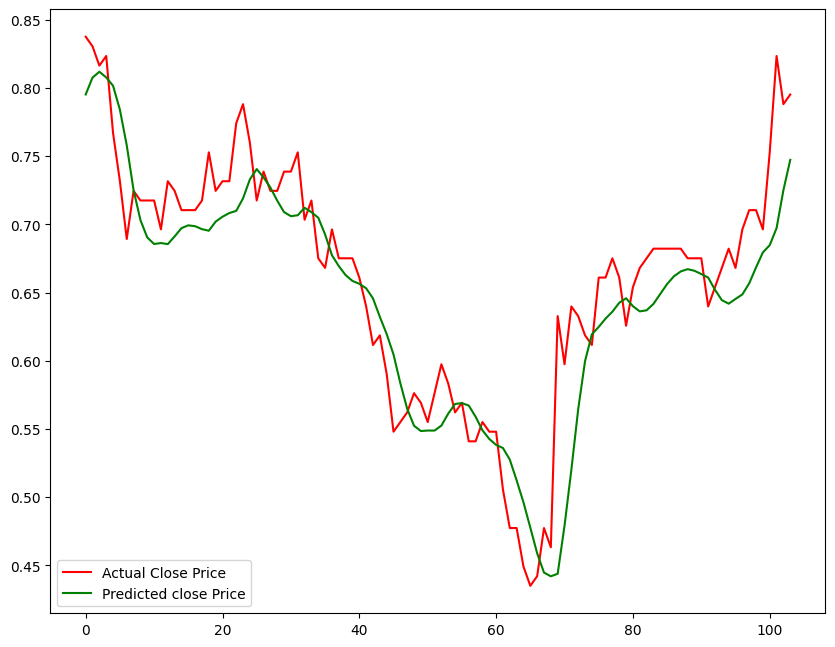

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(y_test, color='red', label = 'Actual Close Price')
plt.plot(y_pred, color='green', label = 'Predicted close Price')
plt.legend(loc='best')